In [3]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=1ed15c3047f01619131539395988d8d14318effb5b719996deef61017d2108fa
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built MiniSom


In [4]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [7]:
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

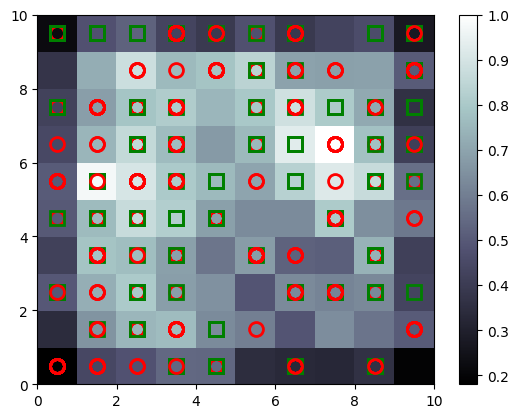

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[Y[i]],
       markeredgecolor = colors[Y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [9]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,5)],mappings[(7,6)]),axis=0)
frauds = sc.inverse_transform(frauds)

In [10]:
print("Fraud Customer IDs")
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15585855
15799785
15589881
15602456
15580579
15651868
15716082
15651460
15672637
15752344
15736533
15779207
15611409
15636454
15615296


In [11]:
customers = dataset.iloc[:,1:].values
print(customers)

[[1.000e+00 2.208e+01 1.146e+01 ... 1.000e+02 1.213e+03 0.000e+00]
 [0.000e+00 2.267e+01 7.000e+00 ... 1.600e+02 1.000e+00 0.000e+00]
 [0.000e+00 2.958e+01 1.750e+00 ... 2.800e+02 1.000e+00 0.000e+00]
 ...
 [0.000e+00 1.883e+01 9.540e+00 ... 1.000e+02 1.000e+00 1.000e+00]
 [0.000e+00 2.742e+01 1.450e+01 ... 1.200e+02 1.200e+01 1.000e+00]
 [1.000e+00 4.100e+01 4.000e-02 ... 5.600e+02 1.000e+00 1.000e+00]]


In [17]:
isfraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    isfraud[i] = 1

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [19]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(customers, isfraud, batch_size = 1, epochs = 10)
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

print(y_pred)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.3699 - accuracy: 0.9783
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1992 - accuracy: 0.9783
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1321 - accuracy: 0.9783
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.9783
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0960 - accuracy: 0.9783
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9783
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9783
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0757 - accuracy: 0.9783
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9783
Epoch 10/10
22/22 [==============================] - 0s 1ms/step
[[1.56214230e+07 2.10192484e-05]
 [